# Jupyter notebook demonstrating the use of additional PmagPy functions

This Jupyter notebook demonstrates a number of PmagPy functions within a notebook environment running a Python 2.7 kernel. The benefits of working within these notebooks include: reproducibility, interactive code development, convenient workspace for projects, version control (when integrated with GitHub or other version control software) and ease of sharing. The other example PmagPy notebook in this repository (Example_PmagPy_Notebook.ipynb in https://github.com/PmagPy/2016_Tauxe-et-al_PmagPy_Notebooks which can also be seen here: http://pmagpy.github.io/Example_PmagPy_Notebook.html) includes additional instructions on how to get started using PmagPy in the notebook. That example notebook contains a more extended work flow on two data sets while this notebook contains numerous code vignettes to illustrate additional available functionality within the PmagPy module.

The notebook was created by Luke Fairchild and Nicholas Swanson-Hysell and accompanies a paper entitled:

**PmagPy: Software package for paleomagnetic data analysis and a bridge to the Magnetics Information Consortium (MagIC) Database**

*L. Tauxe, R. Shaar, L. Jonestrask, N.L. Swanson-Hysell, R. Minnett, A.A.P., Koppers, C.G. Constable, N. Jarboe, K. Gaastra, and L. Fairchild*

# Contents of the notebook

## Basic function examples
* [The dipole equation](#The-dipole-equation)
* [Get local geomagnetic field estimate from IGRF](#Get-local-geomagnetic-field-estimate-from-IGRF)
* [Plotting directional data](#Plotting-directions)
* [Calculating the angle between two directions](#Calculate-the-angle-between-directions)
* [Fisher means and plotting](#Generate-and-plot-Fisher-distributed-unit-vectors-from-a-specified-distribution)
* [Flip directional data](#Flip-polarity-of-directional-data)

## Paleomagnetic data analysis examples
* [Test if directions are Fisher-distributed](#Test-directional-data-for-Fisher-distribution)
* [Simulating inclination error in paleomagnetic data](#Flattening-and-unflattening-directional-data)
* [Correcting for inclination error using the E/I method](#Estimating-flattening-using-the-E/I-method)

* [Bootstrap reversal test](#Bootstrap-reversal-test)
* [McFadden and McElhinny (1990) reversal Test](#McFadden-and-McElhinny-1990-reversal-test)

## Paleomagnetic poles plotting examples
* [Working with poles](#Working-with-poles)
* [Calculate and plot VGPs](#Calculate-and-plot-VGPs)
* [Plotting APWPs](#Plotting-APWPs)


## Rock magnetism data analysis and visualization examples
* [Working with anisotropy data](#Working-with-anisotropy-data)
* [Working with Curie temperature data](#Curie-temperature-data)
* [Day plots](#Day-plots)
* [Hysteresis loops](#Hysteresis-Loops)
* [Demagnetization curves](#Demagnetization-Curves)

## Additional Features of the Jupyter Notebook
* [Interactive Plotting](#Interactive-plotting)

*Note: This notebook makes use of additional scientific Python modules: **pandas** for reading, displaying, and using data with a dataframe structure, **numpy** array computations and **matplotlib** for plotting. These modules come standard with scientific computing distributions of Python or can be installed separately as needed.*

# Import necessary function libraries for data analysis

The code block below imports the pmagpy module from PmagPy that provides functions that will be used in the data analysis. At present, the most straight-forward way to do so is to install the pmagpy module using the pip package manager by executing this command at the command line:

```pip install pmagpy```

Approachs not using pip can also work. One way would be to download the pmagpy folder from the main PmagPy repository and either put it in the same directory as the notebook or put it anywhere on your local machine and add a statement such as ```export PYTHONPATH=$PYTHONPATH:~/PmagPy``` in your .profile or .bash_profile file that points to where PmagPy is on your local machine (in this example in the home directory). 

With PmagPy available in this way, the function modules from **PmagPy** can be imported:  **pmag**, a module with ~160 (and growing) functions for analyzing paleomagnetic and rock magnetic data and  **ipmag**, a module with functions that combine and extend **pmag** functions and exposes **pmagplotlib** functions in order to generate output that works well within the Jupyter notebook environment. 

To execute the code, click on play button in the menu bar, choose run under the 'cell' menu at the top of the notebook, or type shift+enter.

In [1]:
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag

There are three other important Python libraries (which are bundled with the Canopy and Anaconda installations of Python) that come in quite handy and are used within this notebook:  **numpy** for data analysis using arrays, **pandas** for data manipulation within dataframes and **matplotlib** for plotting. The call ```%matplotlib inline``` results in the plots being shown within this notebook rather than coming up in external windows.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import os
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

Some of the plots below utilize the **Basemap** package which enables the plotting of data on a variety of geographic projections. **Basemap** is not a standard part of most scientific python distributions so you may need to take extra steps to install it. If using the Anaconda distribution, you can type ```conda install basemap``` at the command line. The Enthought Canopy distribution has a GUI package manager that you can use for installing the package although a Canopy subscription (free for academic users) may be necessary for installation. This code cell can be skipped if you don't have Basemap installed as it is only necessary for a few of the code vignettes.

In [3]:
from mpl_toolkits.basemap import Basemap

# The dipole equation

The following demonstrates the use of a simple function (**ipmag.lat_from_inc**) which uses the dipole equation to return expected latitude from inclination data as predicted by a pure geocentric axial dipole. The expected inclination for the geomagnetic field can be calculated from a specified latitude using **ipmag.inc_from_lat**.

In [4]:
inclination = range(0,90,1)
latitude = []
for inc in inclination:
    lat = ipmag.lat_from_inc(inc)
    latitude.append(lat)

In [5]:
ipmag.inc_from_lat(47.5)

65.384378367108695

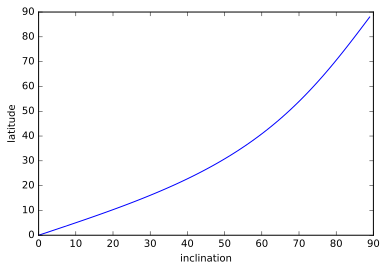

In [6]:
plt.plot(inclination,latitude)
plt.ylabel('latitude')
plt.xlabel('inclination')
plt.show()

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

# Get local geomagnetic field estimate from IGRF

The function **ipmag.igrf** uses the International Geomagnetic Reference Field (IGRF) model to estimate the geomagnetic field direction at a particular location and time. Let's find the direction of the geomagnetic field in Berkeley, California (37.87&deg; N, 122.27&deg; W, elevation of 52 m) on August 27, 2013 (in decimal format, 2013.6544).

In [7]:
berk_igrf = ipmag.igrf([2013.6544, .052, 37.871667, -122.272778])
ipmag.igrf_print(berk_igrf)

Declination: 13.950
Inclination: 61.354
Intensity: 48745.706 nT


[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

# Plotting directions

We can plot this direction using **matplotlib** (**plt**) in conjunction with a few **ipmag** functions. To do this, we first initiate a figure (numbered as Fig. 0, with a size of 6x6) with the following syntax:
```python
plt.figure(num=0,figsize=(6,6))
```
We then draw an equal area stereonet within the figure, specifying the figure number:
```python
ipmag.plot_net(0)
```
Now we can plot the direction we just pulled from IGRF using **ipmag.plot_di()**:
```python
ipmag.plot_di(berk_igrf[0],berk_igrf[1])
```
To label or color the plotted points, we would pass the same code as above with a few extra arguments and one additional line of code:
```python
ipmag.plot_di(berk_igrf[0],berk_igrf[1], color='r', label="Berkeley, CA -- August 27, 2013")
plt.legend()
```
We may wish to save the figure we just created. To do so, we would pass the following *save* function, specifying: 1) the relative path to the folder where we want the figure to be saved and 2) the name of the file with the desired extension (.pdf in this example):
```python
plt.savefig("./Output_files/Berkeley_IGRF.pdf")
```
To ensure the figure is displayed properly and then cleared from the namespace, it is good practice to end such a code block with the following:
```python
plt.show()
```
Now let's run the code we just developed.

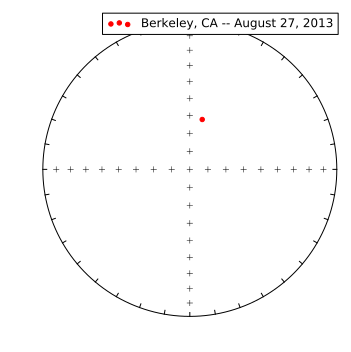

In [8]:
plt.figure(num=0,figsize=(5,5))
ipmag.plot_net(0)
ipmag.plot_di(berk_igrf[0],berk_igrf[1], color='r', label="Berkeley, CA -- August 27, 2013")
plt.legend()
plt.savefig("./Output_files/Berkeley_IGRF.pdf")
plt.show()

Let's see how this magnetic direction compares to the Geocentric Axial Dipole (GAD) model of the geomagnetic field. We can estimate the expected GAD inclination by passing Berkeley's latitude to the function **ipmag.inc_from_lat**.

We also demonstrate below how to manipulate the placement of the figure legend to ensure no data points are obscured. **plt.legend** uses the "best" location by default, but this can be changed with the following:
```python
plt.legend(loc="upper right")
```
or
```python
plt.legend(loc="lower center")
```
See the **plt.legend** documentation for the complete list of placement options. Alternatively, you can give `(x,y)` coordinates to the `loc=` keyword argument (with the origin `(0,0)` at the lower left of the figure). To manipulate placement more precisely, use the keyword `bbox_to_anchor` in conjunction with `loc`. If this is done, `loc` becomes the anchor point on the legend, and `bbox_to_anchor` places this anchor point at the specified coordinates. The latter method is demonstrated below. Play around with the **plt.legend** arguments to see how this changes things.

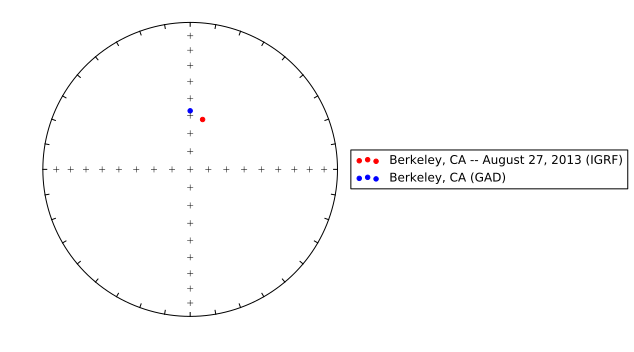

In [9]:
GAD_inc = ipmag.inc_from_lat(37.87)
plt.figure(num=0,figsize=(5,5))
ipmag.plot_net(0)
ipmag.plot_di(berk_igrf[0],berk_igrf[1], color='r', label="Berkeley, CA -- August 27, 2013 (IGRF)")
ipmag.plot_di(0,GAD_inc, color='b', label="Berkeley, CA (GAD)")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Below, we calculate the angular difference between these two directions. 

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

# Calculate the angle between directions

While **ipmag** functions have been optimized to perform tasks within an interactive computing environment such as the Jupyter notebook, the **pmag** functions which are used extensively within **ipmag** can also be directly called. Here is a demonstration of the function **pmag.angle**, which calculates the angle between two directions and outputs a **numpy** array. Continuing our comparison from the last section, let's calculate the angle between the IGRF and GAD-estimated magnetic directions calculated and plotted above. 

In [10]:
direction1 = [berk_igrf[0],berk_igrf[1]]
direction2 = [0,GAD_inc]
print pmag.angle(direction1,direction2)[0]

8.18973048085


[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

# Generate and plot Fisher distributed unit vectors from a specified distribution

Let's use the function **ipmag.fishrot** to generate a set of 50 Fisher-distributed directions at a declination of 200&deg; and inclination of 45&deg;. These directions will serve as an example paleomagnetic dataset that will be used for the next several examples. The output from **ipmag.fishrot** is a nested list of lists of vectors [declination, inclination, intensity]. Generally these vectors are unit vectors with an intensity of 1.0. We refer to this data structure as a di_block. In the code below the first two vectors are shown.

In [11]:
fisher_directions = ipmag.fishrot(k=40, n=50, dec=200, inc=20)
fisher_directions[0:2]

[[183.49855489289564, 20.893462942395065, 1.0],
 [185.21633960195351, 17.194646370552675, 1.0]]

This di_block can be unpacked in separate lists of declination and inclination using the **ipmag.unpack_di_block** function.

In [12]:
fisher_decs, fisher_incs, intensities = ipmag.unpack_di_block(fisher_directions)
print fisher_decs[0]
print fisher_incs[0]

183.498554893
20.8934629424


Another way to deal with the di_block is to make it into a pandas dataframe which allows for the direction to be nicely displayed and analyzed. In the code below, a dataframe is made from the *fisher_directions* di_block and then the first 5 rows are displayed with .head().

In [13]:
directions = pd.DataFrame(fisher_directions,columns=['dec','inc','length'])
directions.head()

,dec,inc,length
0,183.498555,20.893463,1.0
1,185.216340,17.194646,1.0
2,187.986110,8.551023,1.0
3,210.867026,23.523702,1.0
4,194.436125,13.714057,1.0


Now let's calculate the Fisher and Bingham means of these data.

In [14]:
fisher_mean = ipmag.fisher_mean(directions.dec,directions.inc)
bingham_mean = ipmag.bingham_mean(directions.dec,directions.inc)

Here's the raw output of the Fisher mean which is a dictionary containing the mean direction and associated statistics:

In [15]:
fisher_mean

{'alpha95': 2.8886617676562341,
 'csd': 11.500768208596092,
 'dec': 199.72751569658894,
 'inc': 19.846209556243537,
 'k': 49.603958626963312,
 'n': 50,
 'r': 49.012175613472813}

The function **ipmag.print_direction_mean** prints formatted output from this Fisher mean dictionary:

In [16]:
ipmag.print_direction_mean(fisher_mean)

Dec: 199.7  Inc: 19.8
Number of directions in mean (n): 50
Angular radius of 95% confidence (a_95): 2.9
Precision parameter (k) estimate: 49.6


Now we can plot all of our data using the function **ipmag.plot_di**. We can also plot the Fisher mean with its angular radius of 95% confidence ( $\alpha_{95}$ ) using **ipmag.plot_di_mean**.

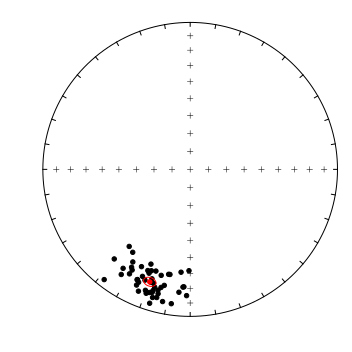

In [17]:
declinations = directions.dec.tolist()
inclinations = directions.inc.tolist()

plt.figure(num=1,figsize=(5,5))
ipmag.plot_net(1)
ipmag.plot_di(declinations,inclinations)
ipmag.plot_di_mean(fisher_mean['dec'],fisher_mean['inc'],fisher_mean['alpha95'],color='r')

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

# Flip polarity of directional data

Let's flip all the directions (find their antipodes) of the Fisher-distributed population using the function **ipmag.do_flip()** function and plot the resulting directions.

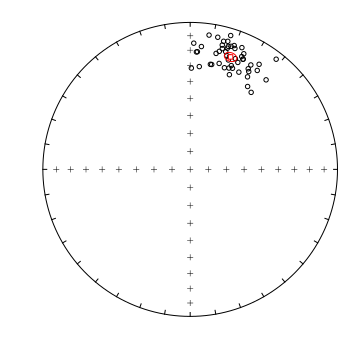

In [18]:
# get reversed directions
dec_reversed,inc_reversed = ipmag.do_flip(declinations,inclinations)

# take the Fisher mean of these reversed directions
rev_mean = ipmag.fisher_mean(dec_reversed,inc_reversed)

# plot the flipped directions
plt.figure(num=1,figsize=(5,5))
ipmag.plot_net(1)
ipmag.plot_di(dec_reversed, inc_reversed)
ipmag.plot_di_mean(rev_mean['dec'],rev_mean['inc'],rev_mean['alpha95'],color='r',marker='s')

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

# Test directional data for Fisher distribution

The function **ipmag.fishqq** tests whether directional data are Fisher-distributed. Let's use this test on the random Fisher-distributed directions we just created (it should pass!). 

{'Dec': 199.71453587618771,
 'Inc': 19.823315632637005,
 'Me': 0.74014509395776518,
 'Me_critical': 1.094,
 'Mode': 'Mode 1',
 'Mu': 0.93848106524478137,
 'Mu_critical': 1.207,
 'N': 50,
 'Test_result': 'consistent with Fisherian model'}

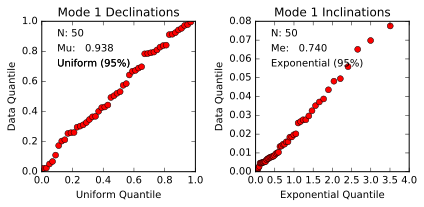

In [19]:
ipmag.fishqq(declinations, inclinations)

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

# Flattening and unflattening directional data

Inclination flattening can occur for magnetizations in sedimentary rocks. We can simulate inclination error of a specified "flattening factor" with the function **ipmag.squish**. Flattening factors range from 0 (completely flattened) to 1 (no flattening). Let's squish our directions with a 0.4 flattening factor.

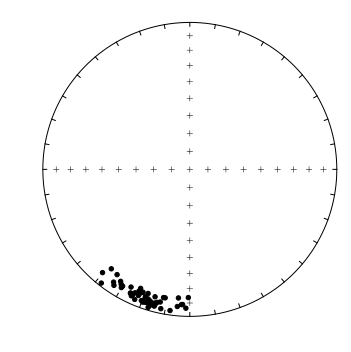

In [20]:
# squish all inclinations
squished_incs = []
for inclination in inclinations:
    squished_incs.append(ipmag.squish(inclination, 0.4))

# plot the squished directional data
plt.figure(num=1,figsize=(5,5))
ipmag.plot_net(1)
ipmag.plot_di(declinations,squished_incs)
squished_DIs = np.array(zip(declinations,squished_incs))

In [21]:
ipmag.fisher_mean(di_block=squished_DIs)

{'alpha95': 2.5305520510287955,
 'csd': 10.098480219446984,
 'dec': 199.76052769392425,
 'inc': 8.3336071978420758,
 'k': 64.336584223983991,
 'n': 50,
 'r': 49.238380455054788}

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

We can also "unsquish" data by a specified flattening factor. Let's unsquish the data we squished above with the  function **ipmag.unsquish**. Using a flattening factor of 0.4 will restore the data to its original state.

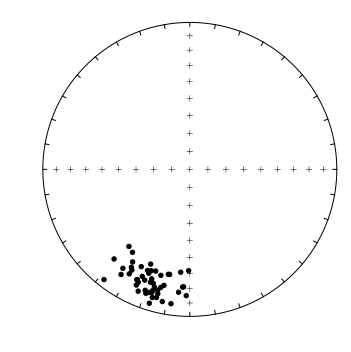

In [22]:
unsquished_incs = []
for squished_inc in squished_incs:
    unsquished_incs.append(ipmag.unsquish(squished_inc, 0.4))

# plot the squished directional data
plt.figure(num=1,figsize=(5,5))
ipmag.plot_net(1)
ipmag.plot_di(declinations,unsquished_incs)

# Estimating inclination flattening using the E/I method

When dealing with a set of flattened data, it is necessary to develop an estimate of how much the data have been flattened. One approach that can be taken using PmagPy is the elongation-inclination (E/I) method of Tauxe and Kent (2004). The code block below simulates directions from the TK03 secular variation model using the **ipmag.tk03** function.

Dec: 357.3  Inc: 60.7
Number of directions in mean (n): 200
Angular radius of 95% confidence (a_95): 2.5
Precision parameter (k) estimate: 16.8


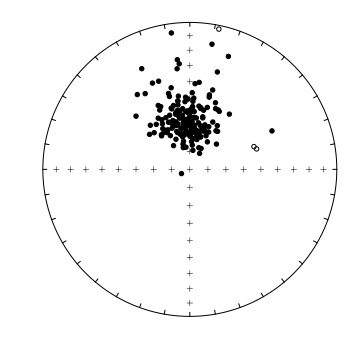

In [23]:
directions_tk03 = ipmag.tk03(n=200,lat=45)
dec_tk03, inc_tk03, int_tk03 = ipmag.unpack_di_block(directions_tk03)
directions_tk03_mean = ipmag.fisher_mean(dec_tk03, inc_tk03)
ipmag.print_direction_mean(directions_tk03_mean)

plt.figure(num=1,figsize=(5,5))
ipmag.plot_net(1)
ipmag.plot_di(dec_tk03, inc_tk03)

The code block below flattens this simulated data set with a flattening factor of 0.3.

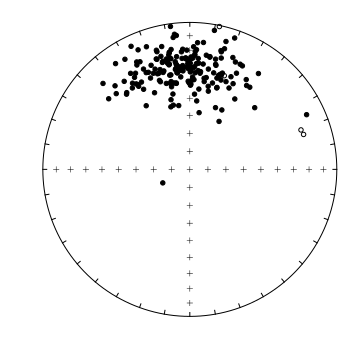

In [24]:
inc_tk03_squished = []
for n in range(len(inc_tk03)):
    inc_tk03_squished.append(ipmag.squish(inc_tk03[n], 0.3))
    
plt.figure(num=1,figsize=(5,5))
ipmag.plot_net(1)
ipmag.plot_di(dec_tk03, inc_tk03_squished)

These flattened data are then passed to the **ipmag.find_ei** function which follows the same work flow as the command line find_ei.py program. The function tries different flattening factors and "unsquishes" inclinations to find the flattening factor that gives an elongation/inclination pair consistent with the TK03 secular variation model. This function should return a flattening factor of 0.3 and an inclination that matches the unflattened inclination of the initially simulated data.

Bootstrapping.... be patient

The original inclination was: 30.8335465601

The corrected inclination is: 58.5900751633
with bootstrapped confidence bounds of: 48.7685585634 to 66.4965182236
and elongation parameter of: 1.46666830928
The flattening factor is: 0.35


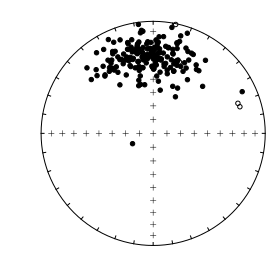

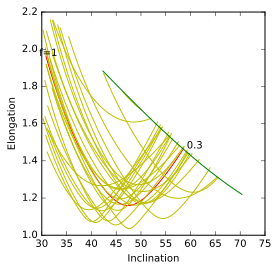

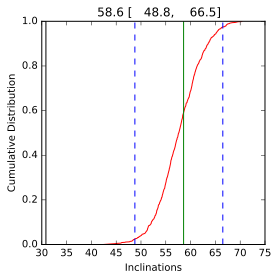

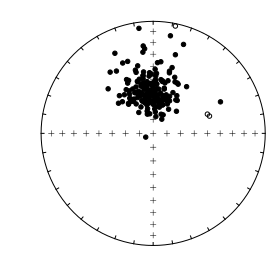

In [25]:
directions_tk03_squished = ipmag.make_di_block(dec_tk03,inc_tk03_squished)

ipmag.find_ei(np.array(directions_tk03_squished),nb=1000)

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

# Bootstrap reversal test

This code uses the **ipmag.fishrot** function to simulate normal directions and reversed directions from antipodal Fisher distributions. It then conducts a bootstrap reversal test (Tauxe, 2010; **ipmag.reversal_test_bootstrap**)  to test if two populations are antipodal to one another (which they should be!)

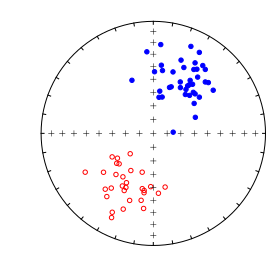

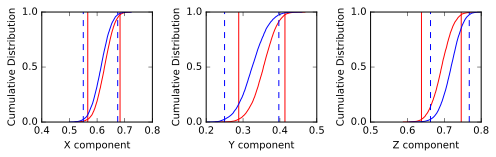

In [26]:
normal_directions = ipmag.fishrot(k=20,n=40,dec=30,inc=45)
reversed_directions = ipmag.fishrot(k=20,n=30,dec=210,inc=-45)
combined_directions = normal_directions + reversed_directions

ipmag.reversal_test_bootstrap(di_block=combined_directions, 
                              plot_stereo=True)

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## McFadden and McElhinny (1990) reversal test

Another reversal test that can be applied to these data is the McFadden and McElhinny (1990) reversal test (**ipmag.reversal_test_MM1990**). This test is an adaptation of the Watson V test for a common mean.

Results of Watson V test: 

Watson's V:           0.5
Critical value of V:  6.0
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 2.3
Critical angle for M&M1990:   7.7
The McFadden and McElhinny (1990) classification for
this test is: 'B'


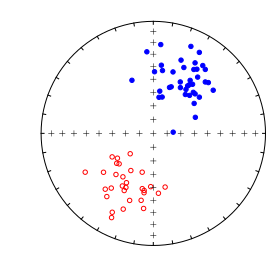

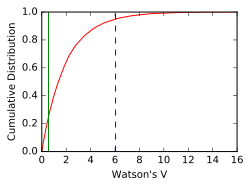

In [27]:
ipmag.reversal_test_MM1990(di_block=combined_directions, 
                           plot_CDF=True, plot_stereo=True)

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

# Working with poles

A variety of plotting functions within PmagPy, together with the Basemap package of matplotlib, provide a great way to work with paleomagnetic poles, virtual geomagnetic poles, and polar wander paths.

In order to get a sense of what the most basic structure of this code block should look like, let's start by manually inputting the data for two random poles.

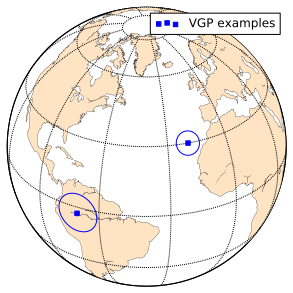

In [28]:
# initiate figure and specify figure size
plt.figure(figsize=(5, 5))

# initiate a Basemap projection, specifying the latitude and
# longitude (lat_0 and lon_0) at which our figure is centered.
pmap = Basemap(projection='ortho',lat_0=30,lon_0=320,
               resolution='c',area_thresh=50000)
# other optional modifications to the globe figure
pmap.drawcoastlines(linewidth=0.25)
pmap.fillcontinents(color='bisque',lake_color='white',zorder=1)
pmap.drawmapboundary(fill_color='white')
pmap.drawmeridians(np.arange(0,360,30))
pmap.drawparallels(np.arange(-90,90,30))

# Here we plot a pole at 340 E longitude, 30 N latitude with an
# alpha 95 error angle of 5 degrees. Keyword arguments allow us
# to specify the label, shape, and color of this data.
ipmag.plot_pole(pmap,340,30,5,label='VGP examples',
               marker='s',color='Blue')

# We can plot multiple poles sequentially on the same globe using
# the same plot_pole function.
ipmag.plot_pole(pmap,290,-3,9,marker='s',color='Blue')

plt.legend()
plt.show()

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Calculate and plot VGPs

Using the function **ipmag.vgp_calc**, we can calculate virtual geomagnetic poles (VGPs) of our Fisher-distributed directions. We'll need to first assign a location to these magnetic directions - let's assume they are from Berkeley, CA (37.87&deg; N, 122.27&deg; W). 

In [29]:
# plug in site latitude and longitude to the "directions" dataframe
directions['site_lat'] = 37.97
directions['site_lon'] = -122.27

# calculate VGPs (this automatically adds VGP data to the dataframe)
ipmag.vgp_calc(directions, dec_tc = 'dec', inc_tc = 'inc')
directions.head()

,dec,inc,length,site_lat,site_lon,paleolatitude,vgp_lat,vgp_lon,vgp_lat_rev,vgp_lon_rev
0,183.498555,20.893463,1.0,37.97,-122.27,10.805853,-41.114305,233.166659,41.114305,53.166659
1,185.216340,17.194646,1.0,37.97,-122.27,8.795327,-42.981458,230.675473,42.981458,50.675473
2,187.986110,8.551023,1.0,37.97,-122.27,4.299452,-47.085104,225.990306,47.085104,45.990306
3,210.867026,23.523702,1.0,37.97,-122.27,12.279045,-32.028900,201.479189,32.028900,21.479189
4,194.436125,13.714057,1.0,37.97,-122.27,6.956662,-43.102360,217.918233,43.102360,37.918233


The mean pole can be calculated from these VGPs.

In [30]:
mean_pole=ipmag.fisher_mean(directions.vgp_lon.tolist(),
                           directions.vgp_lat.tolist())
ipmag.print_pole_mean(mean_pole)

Plon: 212.7  Plat: -38.3
Number of directions in mean (n): 50
Angular radius of 95% confidence (A_95): 2.6
Precision parameter (k) estimate: 61.9


Plon: 212.7  Plat: -38.3
Number of directions in mean (n): 50
Angular radius of 95% confidence (A_95): 2.6
Precision parameter (k) estimate: 61.9


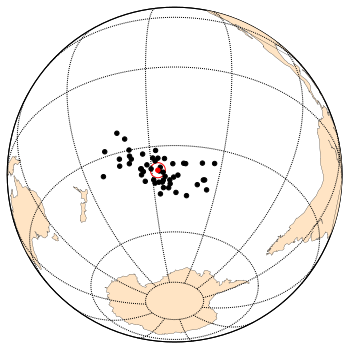

In [31]:
plt.figure(figsize=(6, 6))
pmap = Basemap(projection='ortho',lat_0=-40,lon_0=-140,
               resolution='c',area_thresh=50000)
pmap.drawcoastlines(linewidth=0.25)
pmap.fillcontinents(color='bisque',lake_color='white',zorder=1)
pmap.drawmapboundary(fill_color='white')
pmap.drawmeridians(np.arange(0,360,30))
pmap.drawparallels(np.arange(-90,90,30))

# use the print_pole_mean function to print the mean data above the globe
ipmag.print_pole_mean(mean_pole)
for n in range(len(directions)):
    ipmag.plot_vgp(pmap, directions['vgp_lon'][n], 
                   directions['vgp_lat'][n])
ipmag.plot_pole(pmap, mean_pole['dec'], mean_pole['inc'], 
                mean_pole['alpha95'], color='r')

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Plotting APWPs

Multiple poles can be plotted and used to visualize polar wander paths. Here we use the Phanerozoic APWP of Laurentia *(Torsvik, 2012)* to demonstrate the plot_pole_colorbar function.

We first upload the Torsvik (2012) data using the pandas function *read_csv*. 

In [32]:
Laurentia_Pole_Compilation = pd.read_csv('./Additional_Data/Torsvik2012/Laurentia_Pole_Compilation.csv')
Laurentia_Pole_Compilation.head()

IOError: File ./Additional_Data/Torsvik2012/Laurentia_Pole_Compilation.csv does not exist

In [ ]:
# initiate the figure as in the plot_pole example
plt.figure(figsize=(6, 6))
pmap = Basemap(projection='ortho',lat_0=10,lon_0=320,
               resolution='c',area_thresh=50000)
pmap.drawcoastlines(linewidth=0.25)
pmap.fillcontinents(color='bisque',lake_color='white',zorder=1)
pmap.drawmapboundary(fill_color='white')
pmap.drawmeridians(np.arange(0,360,30))
pmap.drawparallels(np.arange(-90,90,30))

# Loop through the uploaded data and use the plot_pole_colorbar function
# (instead of plot_pole) to plot the individual poles. The input of this
# function is very similar to that of plot_pole but has the additional
# arguments of (1)AGE, (2)MINIMUM AND (3)MAXIMUM AGES OF PLOTTED POLES.
# Note that the ages are treated as negative numbers -- this just determines
# the direction of the colorbar.
for n in xrange (0, len(Laurentia_Pole_Compilation)):
     m = ipmag.plot_pole_colorbar(pmap, Laurentia_Pole_Compilation['CLon'][n],
                                  Laurentia_Pole_Compilation['CLat'][n],
                                  Laurentia_Pole_Compilation['A95'][n],
                                  -Laurentia_Pole_Compilation['Age'][n],
                                  -532,
                                  -300,
                                  markersize=80, color="k", alpha=1)

pmap.colorbar(m,location='bottom',pad="5%",label='Age of magnetization (Ma)')

plt.show()

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

# Working with anisotropy data

The following code demonstrates reading magnetic anisotropy data into a pandas DataFrame.

In [ ]:
aniso_data = pd.read_csv('./Additional_Data/ani_depthplot/rmag_anisotropy.txt',
                         delimiter='\t',skiprows=1)
aniso_data.head()

The function **ipmag.aniso_depthplot** is one example of how PmagPy works with such data to generate plots. 

In [ ]:
ipmag.aniso_depthplot(dir_path='./Additional_Data/ani_depthplot/');

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

# Curie temperature data

In [ ]:
ipmag.curie(path_to_file='./Additional_Data/curie/',
            file_name='curie_example.dat', save=True, 
            save_folder='Additional_Notebook_Output/curie/')

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

# Day plots

Here we demonstrate the function **ipmag.dayplot**, which creates Day plots, squareness/coercivity and squareness/coercivity of remanence diagrams using hysteresis data.

In [ ]:
ipmag.dayplot(path_to_file='./Additional_Data/dayplot_magic/', 
              hyst_file='dayplot_magic_example.dat',
              save=True,save_folder='Additional_Notebook_Output/day_plots/')

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

# Hysteresis Loops

The function **ipmag.hysteresis_magic** generates a set of hysteresis plots with data from a *magic_measurements* file.

In [ ]:
ipmag.hysteresis_magic(path_to_file='./Additional_Data/hysteresis_magic/',
                 hyst_file='hysteresis_magic_example.dat', save=True,
                save_folder='./Additional_Notebook_Output/hysteresis')

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

# Demagnetization Curves

The function **ipmag.demag_magic** filters and plots demagnetization data. These data will be read and combined by expedition, location, site or sample according to the *plot_by* keyword argument. Alternatively, you can choose to plot each specimen measurement individually. By default, all plots generated by this function will be shown. If you only wish to plot a single subset of data, you can use the keyword argument *individual* to specify the name of the one site, location, sample, etc. that you would like to see. 

Below, we use the *magic_measurements.txt* file of Swanson-Hysell et al., 2014 to plot demagnetization data by site. We then specify an individual site ('SI1(58.1 to 64.1)') that will plot alone. Like other functions, these plots can be optionally saved out of the notebook.

In [ ]:
ipmag.demag_magic(path_to_file='./Example_Data/Swanson-Hysell2014/', 
                 plot_by='site', treat='AF', individual= 'SI1(58.1 to 64.1)')

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

# Interactive plotting

IPy widgets add additional interactivity to the Jupyter notebook environment by enabling user interaction with figures. We first demonstrate the use of the **interact** widget, imported below.

*Note: If you do not have the ipywidgets package installed, you may choose to either install it through Anaconda or Enthought (depending on your Python distribution), manually install it (a bit more difficult), or simply skip the next few blocks of code. Below are quick installation instructions for those with either an Anaconda or Enthought Canopy distribution.*

***Installation on Anaconda***

On the command line, enter
```bash
conda install ipywidgets
```
Make sure this installs within the Python 2 environment (if you have Python 3 as your default environment).

***Installation on Enthought Canopy***

Open the Canopy application and navigate to the Package Manager. Search for and install ipywidgets.

***Manual Installation via pip***

On the command line, enter
```bash
pip install ipywidgets
```
Make sure this installs within the Python 2 environment (if you have Python 3 as your default environment).

In [ ]:
from ipywidgets import interact

The **interact** widget allows adjustable values (within specified bounds) to all keyword arguments of a function. It can be used as a wrapper function, as seen below. Here we create a new function, **squish_interactive**, which streamlines the **ipmag.squish** function and automatically inputs the fisher-distributed directions created at the beginning of the notebook. This new function also allows us to reduce the keyword arguments to the *factor* variable, which is the only value we want to be actively adjustable. Finally, to make the **squish_interactive** function interactive in the notebook, we "wrap" this function with **@interact** placed directly above our new function.

In [ ]:
@interact
def squish_interactive(flattening_factor=(0.,1.,.1)):
    squished_incs = []
    for inclination in inclinations:
        squished_incs.append(ipmag.squish(inclination, flattening_factor))

    # plot the squished directional data
    plt.figure(num=1,figsize=(5,5))
    ipmag.plot_net(1)
    ipmag.plot_di(declinations,squished_incs)

**interact** can also be used as a regular function call -- the name of the interactive function is passed as the first argument, followed by the adjustable keyword arguments. Below, we demonstrate passing the *curie* function's parameters to **interact**, which allows us to actively adjust the smoothing of the M-T curve and observe how this affects the extracted Curie temperature information. 

In [ ]:
#define separate "curie" function so that some keywords are not interactive
def interactive_curie(win_len=30):
    return ipmag.curie(path_to_file='./Additional_Data/curie/',
                file_name='curie_example.dat',window_length=win_len)

interact(interactive_curie, win_len=(1,60));

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)